# Dot Cipher from Segment.io Website

# Important Questions
1. How many rows?
2. How many columns?
3. Unique colors?
4. How many circles(dots)?
5. How many columns with unique colors? Which columns?
6. How many rows with unique colors? Which rows?

# Python Libraries

In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np
from xml.dom import minidom
from IPython.display import Markdown, display

# The Original Unedited Image

In [2]:
Image(url= "data.svg")

# Useful Classes and Functions

In [3]:
class SVG(object):
    def __init__(self, filename):
        self.xml = minidom.parse(filename)

In [4]:
class Circle(object):
    def __init__(self, x, y, color):
        self.x = Circle.normalizeX(x)
        self.y = Circle.normalizeY(y)
        self.color = color
    
    def normalizeX(x):
        return int((int(x)-3)/11)

    def normalizeY(y):
        return int((int(y)-3)/8)

    def unnormalizeX(x):
        return str((x * 11) + 3)

    def unnormalizeY(y):
        return str((y * 8) + 3)

    #  <circle fill="#49B882" transform="rotate(180 3 139)" cx="3" cy="139" r="3"/>
    def convert_to_xml(self):
        doc = minidom.Document()
        circleElement = doc.createElement("circle")
        circleElement.setAttribute("fill",self.color)
        circleElement.setAttribute("transform","rotate(180 {} {})".format(Circle.unnormalizeX(self.x),Circle.unnormalizeY(self.y)))
        circleElement.setAttribute("cx",Circle.unnormalizeX(self.x))
        circleElement.setAttribute("cy",Circle.unnormalizeY(self.y))
        circleElement.setAttribute("r","3")
        return circleElement

In [5]:
# To Print in Markdown
def printmd(string):
    display(Markdown(string))
    
def exportSVG(filename,xml):
    file_handle = open(filename,"w")
    xml.writexml(file_handle)
    file_handle.close()

def convertCirclesToXML(circles):
    for circle in circles:
        return circle.convert_to_xml()
        
testCircles = []
testCircles.append(Circle(14,33,"#49B882"))
exportSVG("test.svg",convertCirclesToXML(testCircles))

# Data Load - Parsing XML of SVG file

In [6]:
doc_root = SVG('data.svg').xml.documentElement

svg_groups = doc_root.getElementsByTagName('g')

printmd('**SVG Groups:** {}\n'.format(len(doc_root.getElementsByTagName('g'))))
printmd('**SVG Width:** {}\n'.format(doc_root.getAttribute('width')))
printmd('**SVG Height:** {}\n'.format(doc_root.getAttribute('height')))
printmd('**SVG Left Group {} Circle Count:** {}\n'.format(1,len(svg_groups[1].childNodes)))
printmd('**SVG Center Group {} Circle Count:** {}\n'.format(3,len(svg_groups[3].childNodes)))
printmd('**SVG Right Group {} Circle Count:** {}\n'.format(2,len(svg_groups[2].childNodes)))

**SVG Groups:** 4


**SVG Width:** 1413


**SVG Height:** 150


**SVG Left Group 1 Circle Count:** 54


**SVG Center Group 3 Circle Count:** 567


**SVG Right Group 2 Circle Count:** 55


In [7]:
doc_root.childNodes[1].removeChild(doc_root.childNodes[1].childNodes[0])
doc_root.childNodes[1].removeChild(doc_root.childNodes[1].childNodes[0])
exportSVG("center.svg",doc_root)
file_handle = open("center.svg","w")
doc_root.writexml(file_handle)
file_handle.close()

In [8]:
# Images with bookend data removed
Image(url= "center.svg")

# Circles

In [9]:
circles = []
for circle in doc_root.getElementsByTagName('g')[1].childNodes:
    circles.append(Circle(circle.attributes['cx'].value,circle.attributes['cy'].value,circle.attributes['fill'].value))

In [10]:
numCircles = len(circles)
printmd('# Number of Circles: {}\n'.format(numCircles))

# Number of Circles: 567


# Colors

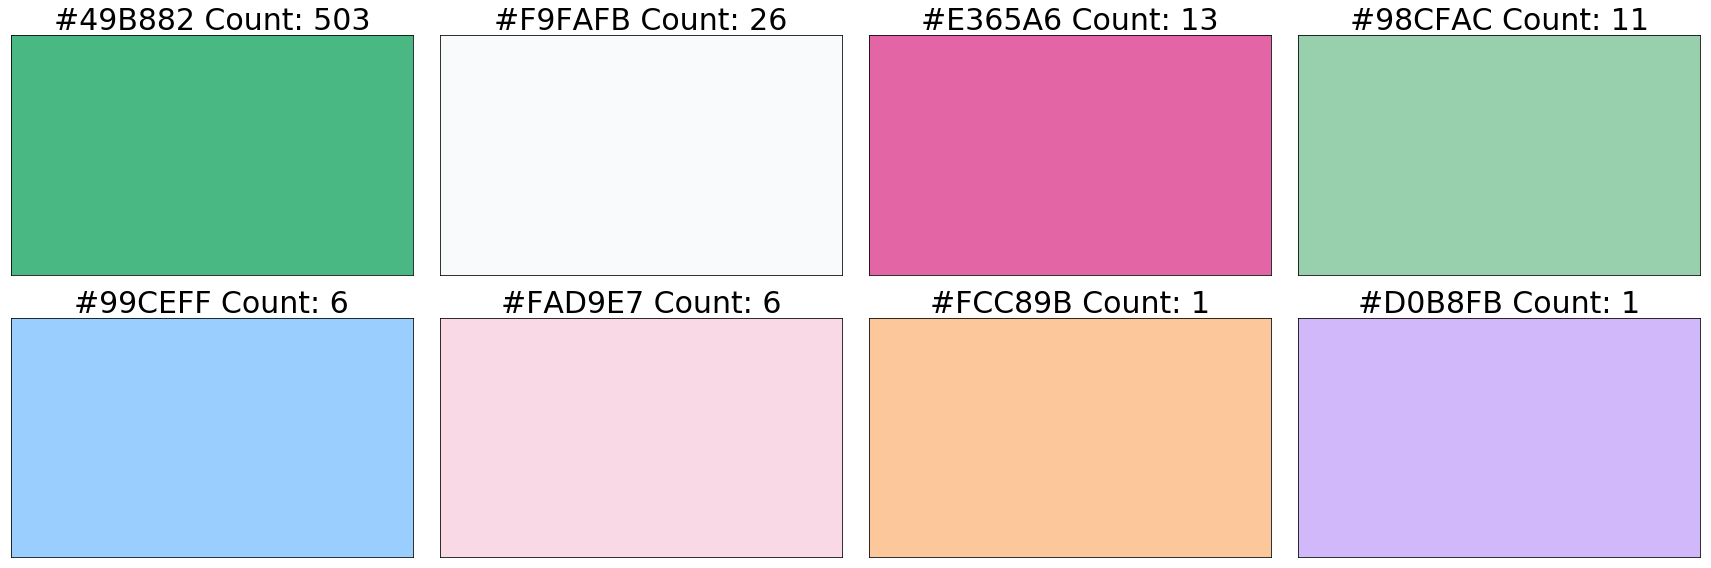

In [11]:
colors = list(set(circle.color for circle in circles))
colorCounts = Counter(circle.color for circle in circles).most_common()
plt.figure(figsize=(24, 8))

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)

for index, colorCount in enumerate(colorCounts):
    ax1 = plt.subplot(2, 4, index + 1)
    ax1.set_title(colorCount[0] + " Count: " + str(colorCount[1]),fontsize= 30)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_facecolor(colorCount[0])
    
plt.tight_layout()
plt.show()

# Rows and Columns

In [12]:
columns = sorted(set(circle.x for circle in circles))
numColumns = len(columns)
printmd('# Columns: {}\n'.format(numColumns))

rows = sorted(set(circle.y for circle in circles))
numRows = len(rows)
printmd('# Rows: {}\n'.format(numRows))

# Columns: 94


# Rows: 19


In [13]:
circles_per_column = Counter(circle.x for circle in circles)
circles_per_row = Counter(circle.y for circle in circles)

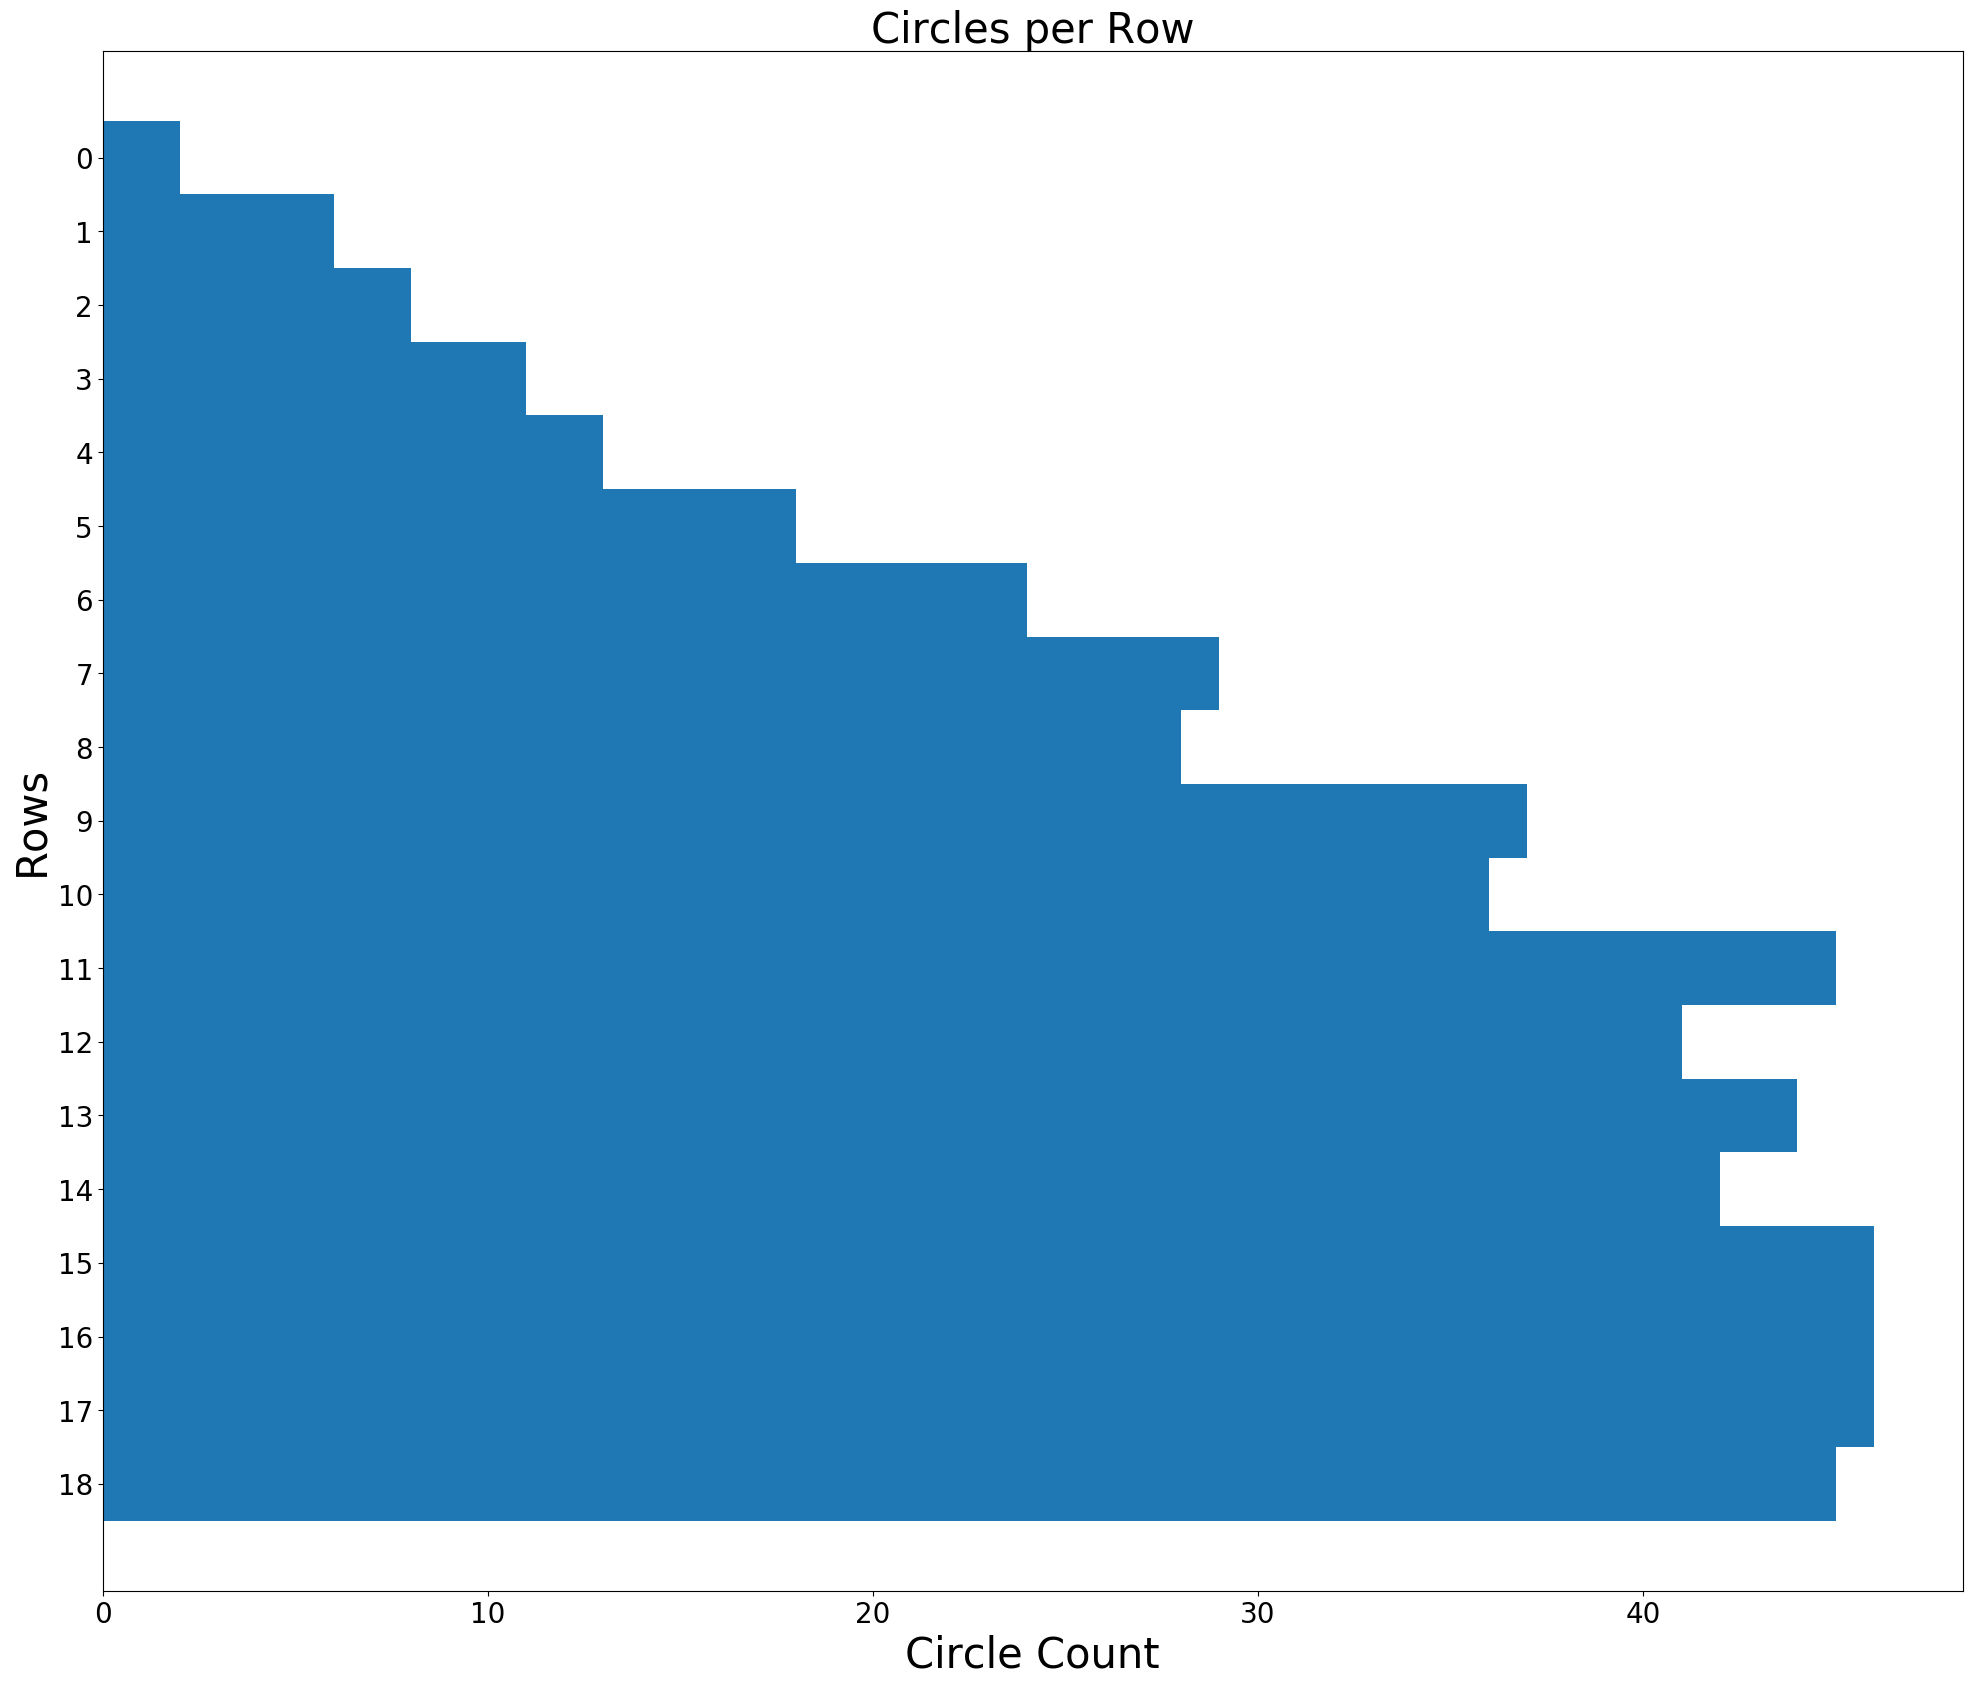

In [14]:
labels, values = zip(*circles_per_row.items())
indexes = np.arange(len(labels))
plt.rcdefaults()
fig, ax = plt.subplots(1,1,figsize=(24,20))
ax.set_title('Circles per Row',fontsize= 30)
ax.barh(indexes, values,1, align='center', ecolor='black')
ax.set_yticks(indexes)
ax.set_yticklabels(labels,fontsize= 30)
ax.set_ylabel('Rows',fontsize= 30)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Circle Count',fontsize= 30)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

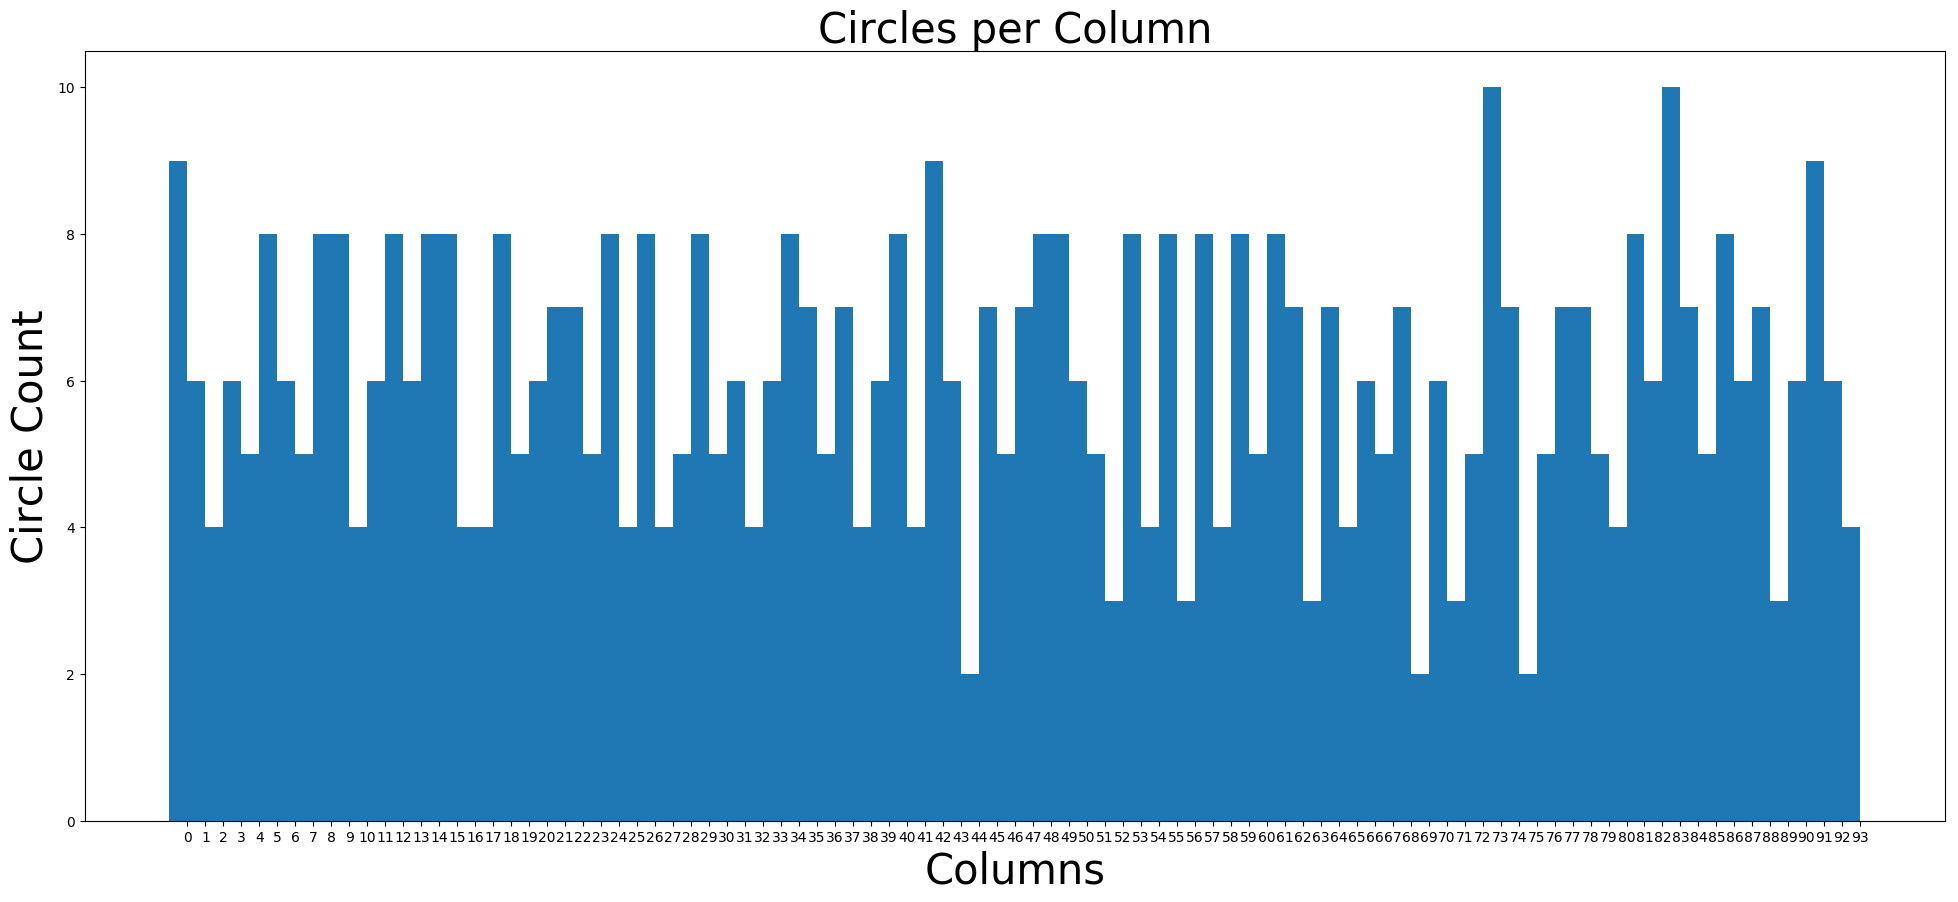

In [15]:
labels, values = zip(*circles_per_column.items())
indexes = np.arange(len(labels))
fig, ax = plt.subplots(1,1,figsize=(24,10))
ax.set_title('Circles per Column',fontsize= 30)
plt.bar(indexes, values, 1, align='center', ecolor='black')
plt.xticks(indexes + 1 * 0.5, labels)
ax.set_xlabel('Columns',fontsize= 30)
ax.set_ylabel('Circle Count',fontsize= 30)
plt.show()

In [16]:
color_circles = [circle for circle in circles if circle.color != "#49B882"]
unique_color_x = set(circle.x for circle in color_circles)

color_circle_columns = []
for j in unique_color_x:
    color_circle_columns.append([circle for circle in circles if circle.x == j])

dots_per_color_column = Counter(circle.x for circle in color_circles)
dots_per_color_row = Counter(circle.y for circle in color_circles)

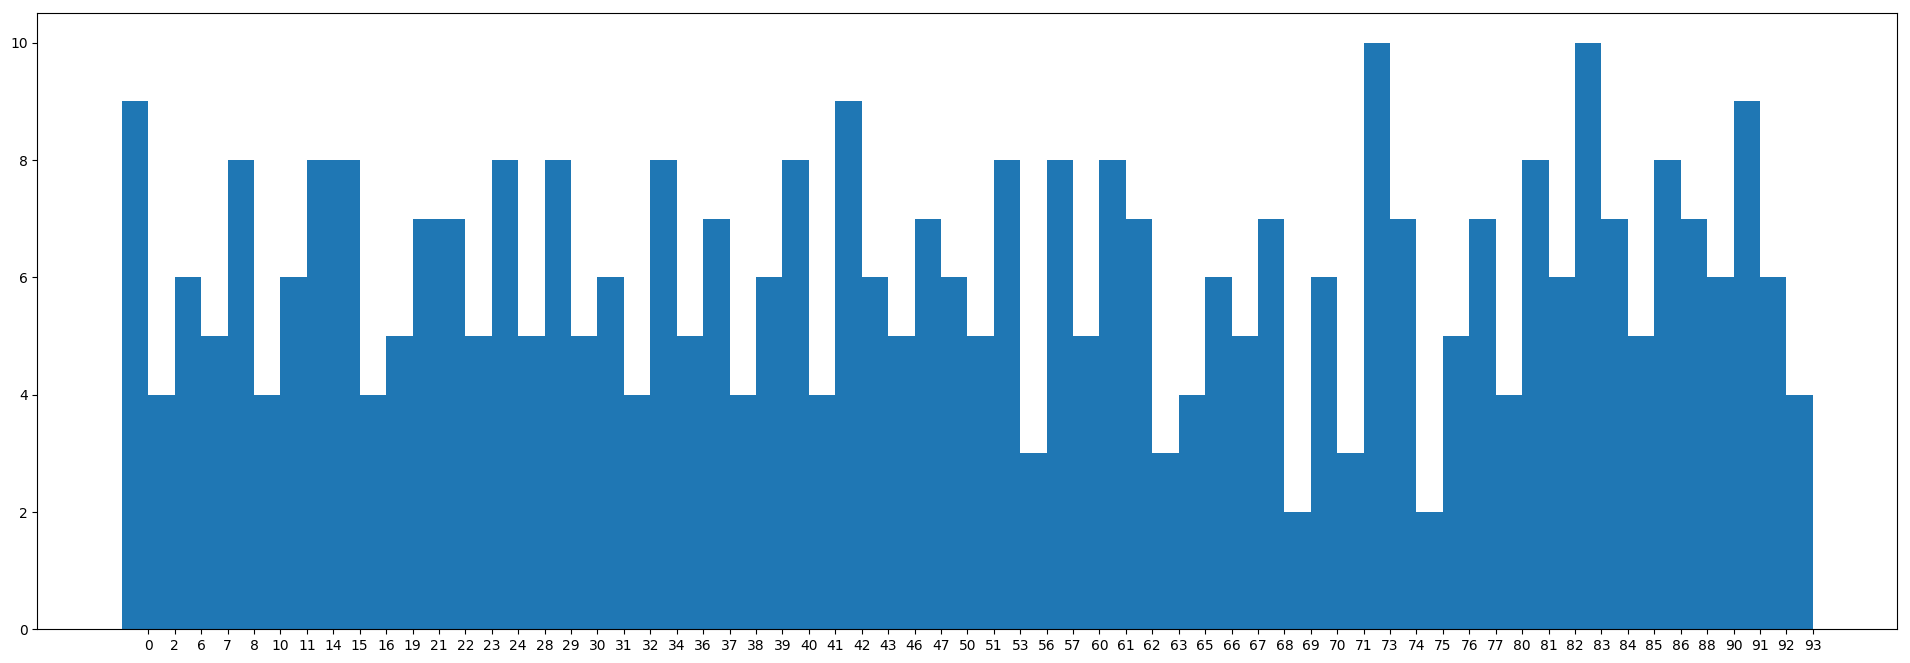

In [17]:
flat_list = [circle for column in color_circle_columns for circle in column]
dots_per_color_column = Counter(circle.x for circle in flat_list)
dots_per_color_row = Counter(circle.y for circle in flat_list)

labels, values = zip(*dots_per_color_column.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(24,8))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

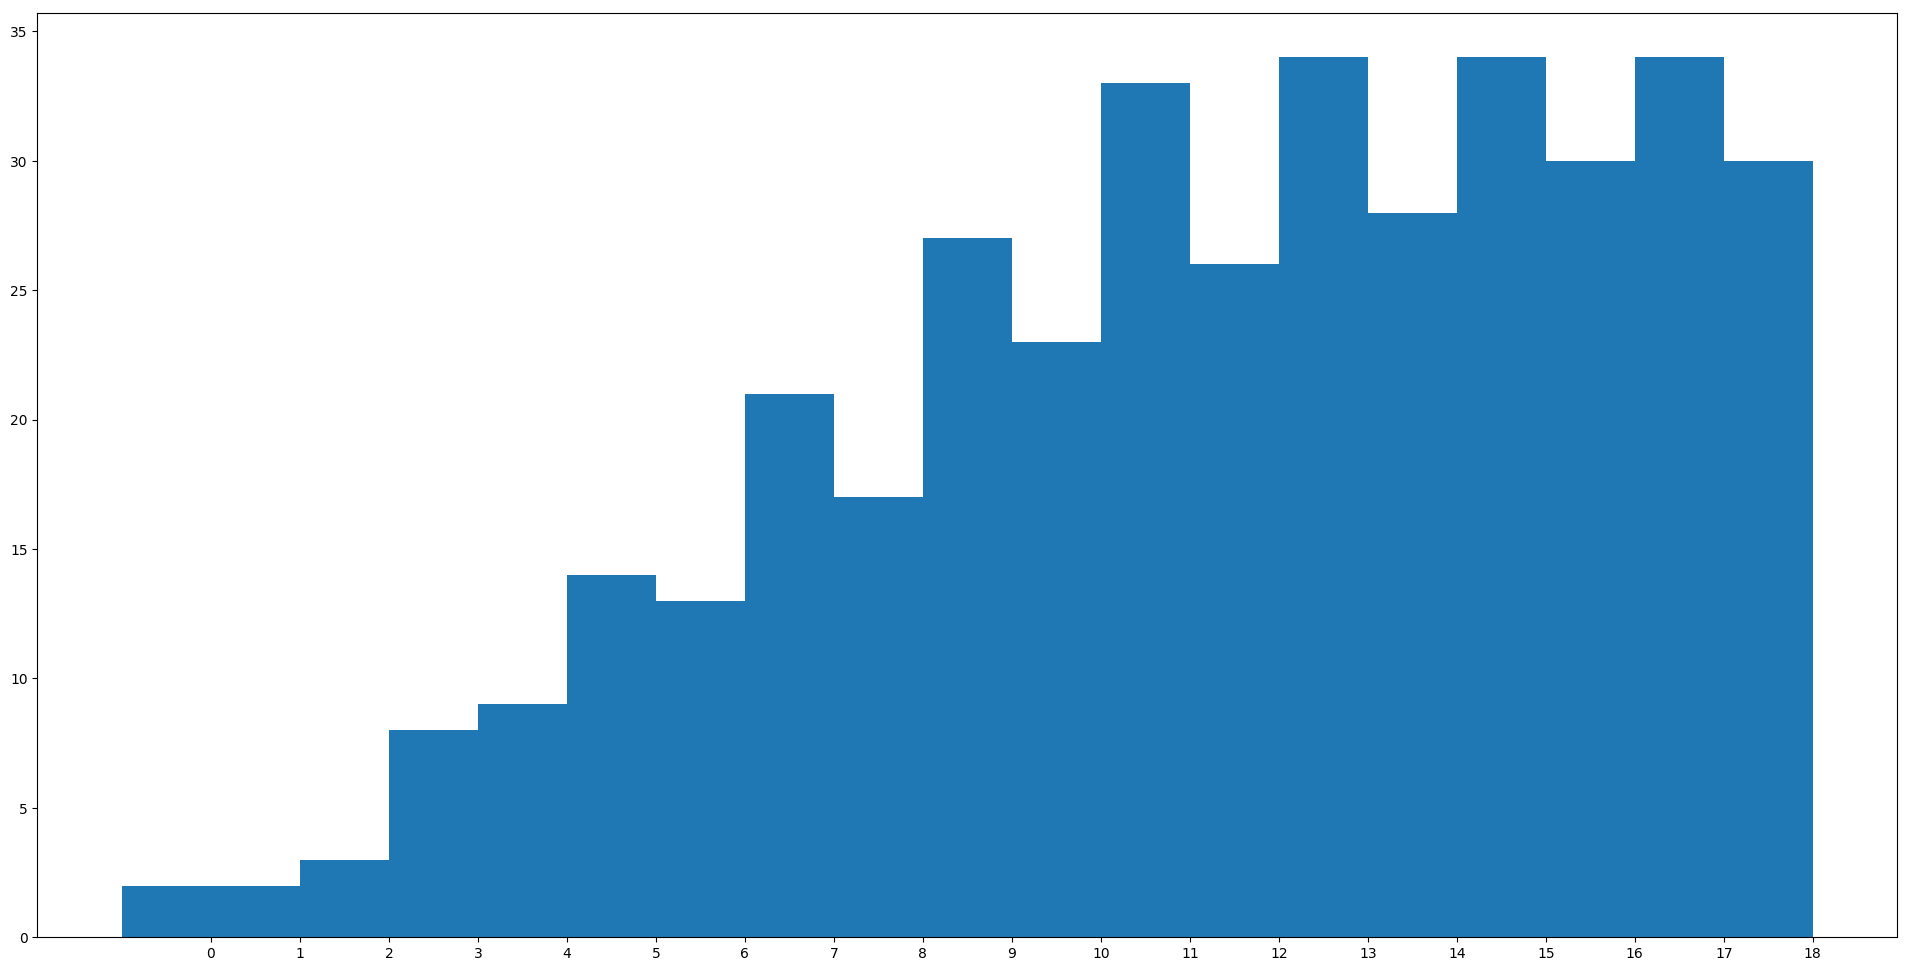

In [18]:
labels, values = zip(*dots_per_color_row.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(24, 12))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()